<a href="https://colab.research.google.com/github/vivekrrg/FarmAssistantFrontEnd/blob/main/fyp_base_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
 
df = pd.read_csv('Crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.size

17600

In [6]:
df.shape

(2200, 8)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
arr=df['label'].unique()

In [9]:
arr

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
arr.size

22

In [11]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [12]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<Axes: >

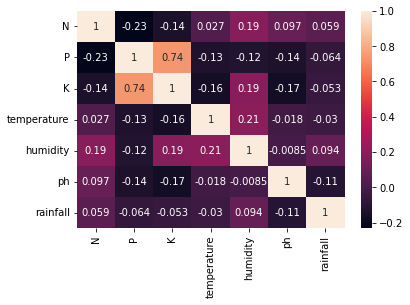

In [13]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

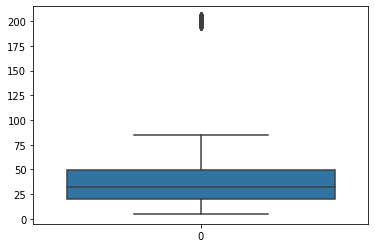

In [14]:
sns.boxplot(df['K'])

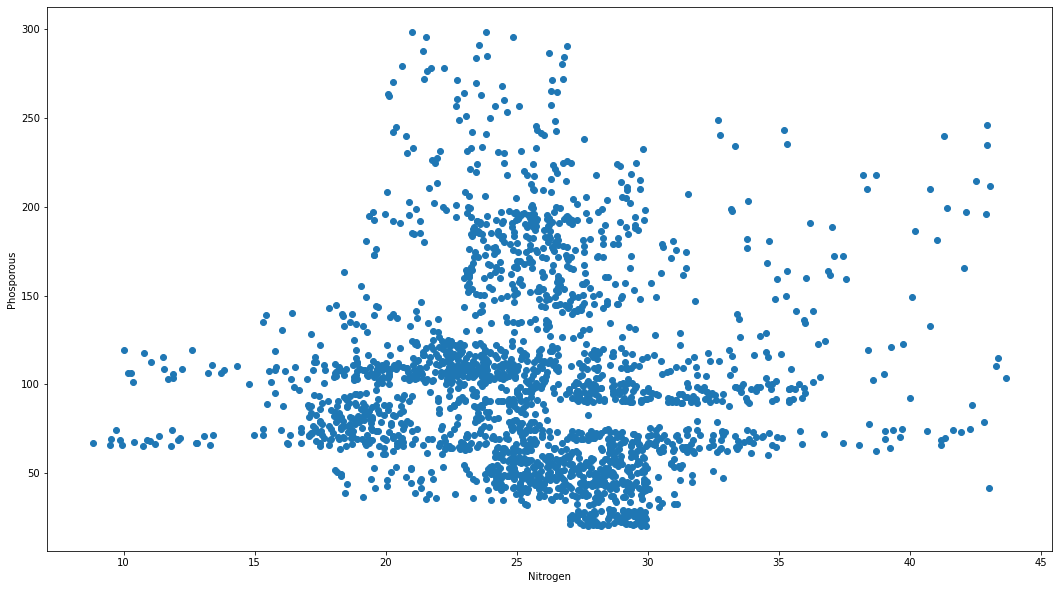

In [15]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df['temperature'], df['rainfall'])
 
# x-axis label
ax.set_xlabel('Nitrogen')
 
# y-axis label
ax.set_ylabel('Phosporous')
plt.show()

In [16]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

Visualization 


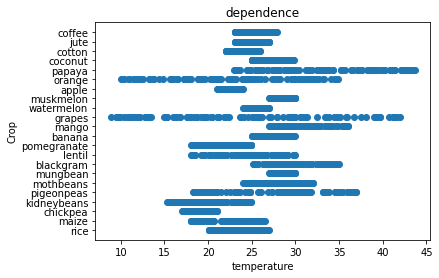

In [17]:
# Create a scatter plot of rainfall and crop yield
plt.scatter(df['temperature'], df['label'])

# Add a title and axis labels
plt.title('dependence')
plt.xlabel('temperature')
plt.ylabel('Crop')

# Show the plot
plt.show()

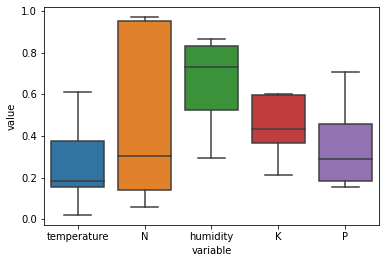

In [18]:
import numpy as np; np.random.seed(42)

df = pd.DataFrame(data = np.random.random(size=(5,5)), columns = ['temperature','N','humidity','K','P'])

sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

In [19]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# target = label_encoder.fit_transform(target)
# label_encoder_name_mapping = dict(zip(label_encoder.classes_,
#                                          label_encoder.transform(label_encoder.classes_)))
# print("Mapping of Label Encoded Classes", label_encoder_name_mapping, sep="\n")
# print("Label Encoded Target Variable", target, sep="\n")

In [20]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
modelName = []

In [21]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.3,random_state =2)

In [22]:
Ytest

2121         coffee
960     pomegranate
952     pomegranate
1958         cotton
681        mungbean
           ...     
794       blackgram
287        chickpea
1054         banana
2042           jute
1719         papaya
Name: label, Length: 660, dtype: object

# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
modelName.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  85.9090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.65      1.00      0.79        28
    chickpea       1.00      1.00      1.00        29
     coconut       0.94      1.00      0.97        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      0.97      0.98        31
      grapes       1.00      1.00      1.00        29
        jute       0.50      0.03      0.06        33
 kidneybeans       0.00      0.00      0.00        30
      lentil       0.63      1.00      0.77        32
       maize       0.97      1.00      0.98        32
       mango       1.00      1.00      1.00        33
   mothbeans       0.00      0.00      0.00        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00 

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [26]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [27]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# GaussianNB

In [28]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
modelName.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9924242424242424
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        31
      grapes       1.00      1.00      1.00        29
        jute       0.89      0.97      0.93        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00 

In [29]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [30]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# LogisticRegression

In [31]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
modelName.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9621212121212122
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.92      0.82      0.87        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       0.91      0.94      0.92        31
      grapes       1.00      1.00      1.00        29
        jute       0.86      0.94      0.90        33
 kidneybeans       0.97      1.00      0.98        30
      lentil       0.91      1.00      0.96        32
       maize       0.94      0.91      0.92        32
       mango       0.97      1.00      0.99        33
   mothbeans       0.83      0.83      0.83        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00   

In [32]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

In [33]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
modelName.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9893939393939394
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.97      1.00      0.98        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        31
      grapes       1.00      1.00      1.00        29
        jute       0.89      0.94      0.91        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      0.97      0.98        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00

In [35]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

In [36]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# xgboost

In [37]:
import xgboost as xgb
#pip install 'scikit-learn==0.15'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(Ytrain)
XB = xgb.XGBClassifier()
XB.fit(Xtrain,y_train)
 

y_pred = XB.predict(Xtest)
y_pred = le.inverse_transform(y_pred)

x = metrics.accuracy_score(Ytest, y_pred)
acc.append(x)
modelName.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest.astype(str) , y_pred.astype(str)))

XGBoost's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       0.97      1.00      0.99        33
      cotton       1.00      1.00      1.00        31
      grapes       1.00      1.00      1.00        29
        jute       1.00      0.91      0.95        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00     

In [38]:
# Cross validation score (XGBoost)
XB_target=le.fit_transform(target)
score = cross_val_score(XB, features, XB_target, cv=5)
score

array([0.99318182, 0.99318182, 0.99318182, 0.99090909, 0.99090909])

In [39]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

# KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(5) # Define classifier
knn.fit(Xtrain, Ytrain) # Train model

KNeighborsClassifier()

In [41]:
y_pred = knn.predict(Xtest)

In [42]:
knn_test_accuracy = metrics.accuracy_score(Ytest, y_pred) # Calculate Accuracy

In [43]:
knn_test_accuracy

0.9848484848484849

In [44]:
acc.append(knn_test_accuracy)
modelName.append('KNN')
print("KNN's Accuracy is: ", x)

print(classification_report(Ytest.astype(str) , y_pred.astype(str)))

KNN's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       0.97      1.00      0.98        31
      grapes       1.00      1.00      1.00        29
        jute       0.91      0.88      0.89        33
 kidneybeans       0.97      1.00      0.98        30
      lentil       0.97      1.00      0.98        32
       maize       1.00      0.97      0.98        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      0.97      0.98        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.0

In [45]:
score = cross_val_score(knn, features, target, cv=5)
score

array([0.97727273, 0.98181818, 0.97954545, 0.97954545, 0.97954545])

In [46]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
knn_pkl_filename = 'knn.pkl'
# Open the file to save as pkl file
knn_Model_pkl = open(knn_pkl_filename, 'wb')
pickle.dump(knn, knn_Model_pkl)
# Close the pickle instances
knn_Model_pkl.close()

# Neural network

In [47]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1, max_iter=10000)
mlp.fit(Xtrain, Ytrain)


MLPClassifier(alpha=1, max_iter=10000)

In [48]:
y_pred = mlp.predict(Xtest)
# Test set performance
x = metrics.accuracy_score(Ytest, y_pred) # Calculate Accuracy

In [49]:
acc.append(x)
modelName.append('MLP')
print("MLP's Accuracy is: ", x)

print(classification_report(Ytest.astype(str) , y_pred.astype(str)))

MLP's Accuracy is:  0.9454545454545454
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.95      0.68      0.79        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       0.96      0.74      0.84        31
      grapes       1.00      1.00      1.00        29
        jute       0.91      0.64      0.75        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       0.84      1.00      0.91        32
       maize       0.79      0.97      0.87        32
       mango       1.00      1.00      1.00        33
   mothbeans       0.81      0.90      0.85        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.0

In [50]:
score = cross_val_score(knn, features, target, cv=5)
score

array([0.97727273, 0.98181818, 0.97954545, 0.97954545, 0.97954545])

In [51]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
mlp_pkl_filename = 'mlp.pkl'
# Open the file to save as pkl file
mlp_Model_pkl = open(mlp_pkl_filename, 'wb')
pickle.dump(mlp, mlp_Model_pkl)
# Close the pickle instances
mlp_Model_pkl.close()

# Comparison of above algorithms

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

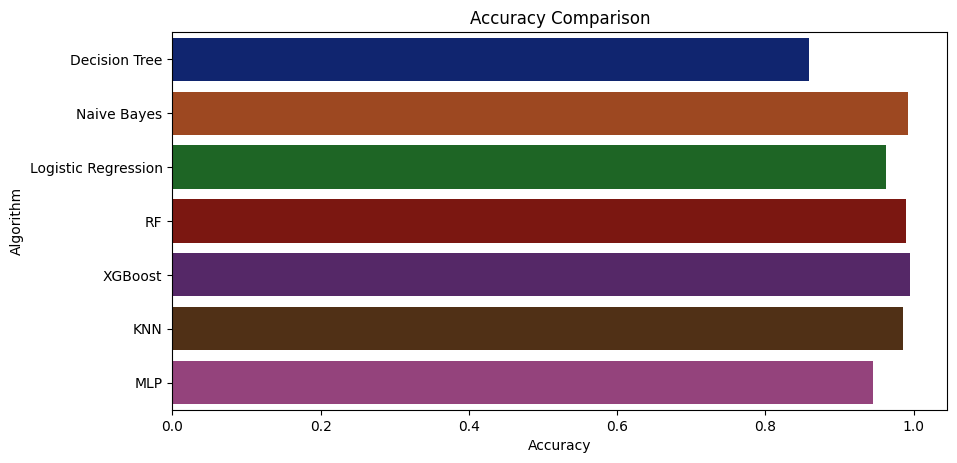

In [52]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y =modelName,palette='dark')

In [53]:
accuracy_models = dict(zip(modelName, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.8590909090909091
Naive Bayes --> 0.9924242424242424
Logistic Regression --> 0.9621212121212122
RF --> 0.9893939393939394
XGBoost --> 0.9954545454545455
KNN --> 0.9848484848484849
MLP --> 0.9454545454545454


In [54]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [55]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = mlp.predict(data)
print(prediction)

['jute']


# Stacking the above models and analysing the combine model

In [56]:

# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [57]:
estimator_list = [
    ('knn',knn),
    ('XGB',XB),
    ('LR',LogReg),
    ('dt',DecisionTree),
    ('rf',RF),
    ('NBS',NaiveBayes),
    ("MLP",mlp) ]

In [58]:
# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

In [59]:
# Train stacked model
stack_model.fit(Xtrain, Ytrain)

StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interac...
                                              num_parallel_tree=None,
                                              objective='multi:softprob',
                                              predictor=None, ...)),
                               ('LR', LogisticRegression(random_state=2)),
                               ('dt',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=5,
                                                       random_state=2)),
                               ('rf',
                                RandomForestClassifier(n_estimators=20,
                                                       random_state=0)),
                               ('NBS', GaussianNB()),
                               ('MLP', MLPClassifier(alpha=1, max_iter=10000))],
                   final_estimator=LogisticRegression())

In [60]:
y_test_pred = stack_model.predict(Xtest)

In [61]:
stack_model_test_accuracy = metrics.accuracy_score(Ytest, y_test_pred) # Calculate Accuracy

In [62]:
stack_model_test_accuracy

0.9954545454545455

Max Voting


The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction.

For example, when you asked 5 of your colleagues to rate your movie (out of 5); we’ll assume three of them rated it as 4 while two of them gave it a 5. Since the majority gave a rating of 4, the final rating will be taken as 4. You can consider this as taking the mode of all the predictions.

# Ensembling the RandomForestClassifier with others and comparing the accuracy

In [63]:
acc1=[]
modelName1=[]

for i in acc:
  acc1.append(i)

for i in modelName:
  modelName1.append(i); 

acc=[]
modelName=[]

In [64]:
from sklearn.ensemble import VotingClassifier
model1 = RandomForestClassifier(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain) 
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("RandomForestClassifier-DecisionTree")

In [65]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.99772727, 0.98636364, 0.99545455, 0.99090909, 0.98863636])

In [66]:
from sklearn.ensemble import VotingClassifier
model1 = RandomForestClassifier(random_state=1)
model2 = xgb.XGBClassifier()
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain) 
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("RandomForestClassifier-XGBClassifier")

In [67]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.99318182, 0.99090909, 0.99545455, 0.99090909, 0.99090909])

In [68]:
from sklearn.ensemble import VotingClassifier
model1 = RandomForestClassifier(random_state=1)
model2 =GaussianNB()
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("RandomForestClassifier-GaussianNB")

In [69]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99318182, 0.98863636])

In [70]:
from sklearn.ensemble import VotingClassifier
model1 = RandomForestClassifier(random_state=1)
model2 = LogisticRegression(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
model.score(Xtest,Ytest)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("RandomForestClassifier-LogisticRegression")

In [71]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.97045455, 0.98181818, 0.96590909, 0.975     , 0.97045455])

# Ensembling the LogisticRegression with others models and check the accuracy

In [72]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("LogisticRegression-DecisionTree")

In [73]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.96818182, 0.97272727, 0.96363636, 0.975     , 0.96818182])

In [74]:
from sklearn.ensemble import VotingClassifier
model1 = GaussianNB()
model2 = LogisticRegression(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("LogisticRegression-GaussianNB")

In [75]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.97045455, 0.98181818, 0.96590909, 0.97727273, 0.975     ])

In [76]:
from sklearn.ensemble import VotingClassifier
model1 = xgb.XGBClassifier()
model2 = LogisticRegression(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("LogisticRegression-GaussianNB") 

In [77]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.97045455, 0.98181818, 0.96363636, 0.97272727, 0.97045455])

# Ensemble the GuassianNB with other models

In [78]:
from sklearn.ensemble import VotingClassifier
model1 = GaussianNB()
model2 = tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain) 
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("GaussianNB-DecisionTree") 

In [79]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.99772727, 0.98863636, 0.99318182, 0.99318182, 0.98636364])

In [80]:
from sklearn.ensemble import VotingClassifier
model1 = GaussianNB()
model2 = xgb.XGBClassifier()
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("GaussianNB-XGBClassifier") 


In [81]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.99318182, 0.99318182, 0.99318182, 0.99090909, 0.98636364])

Now by voting we have compare the pair of 2-2 algorithms, lets check the accuracy of each combination

In [82]:
accuracy_models = dict(zip(modelName, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

RandomForestClassifier-DecisionTree --> 0.990909090909091
RandomForestClassifier-XGBClassifier --> 0.9939393939393939
RandomForestClassifier-GaussianNB --> 0.9939393939393939
RandomForestClassifier-LogisticRegression --> 0.9772727272727273
LogisticRegression-DecisionTree --> 0.9727272727272728
LogisticRegression-GaussianNB --> 0.9742424242424242
GaussianNB-DecisionTree --> 0.9893939393939394
GaussianNB-XGBClassifier --> 0.990909090909091


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

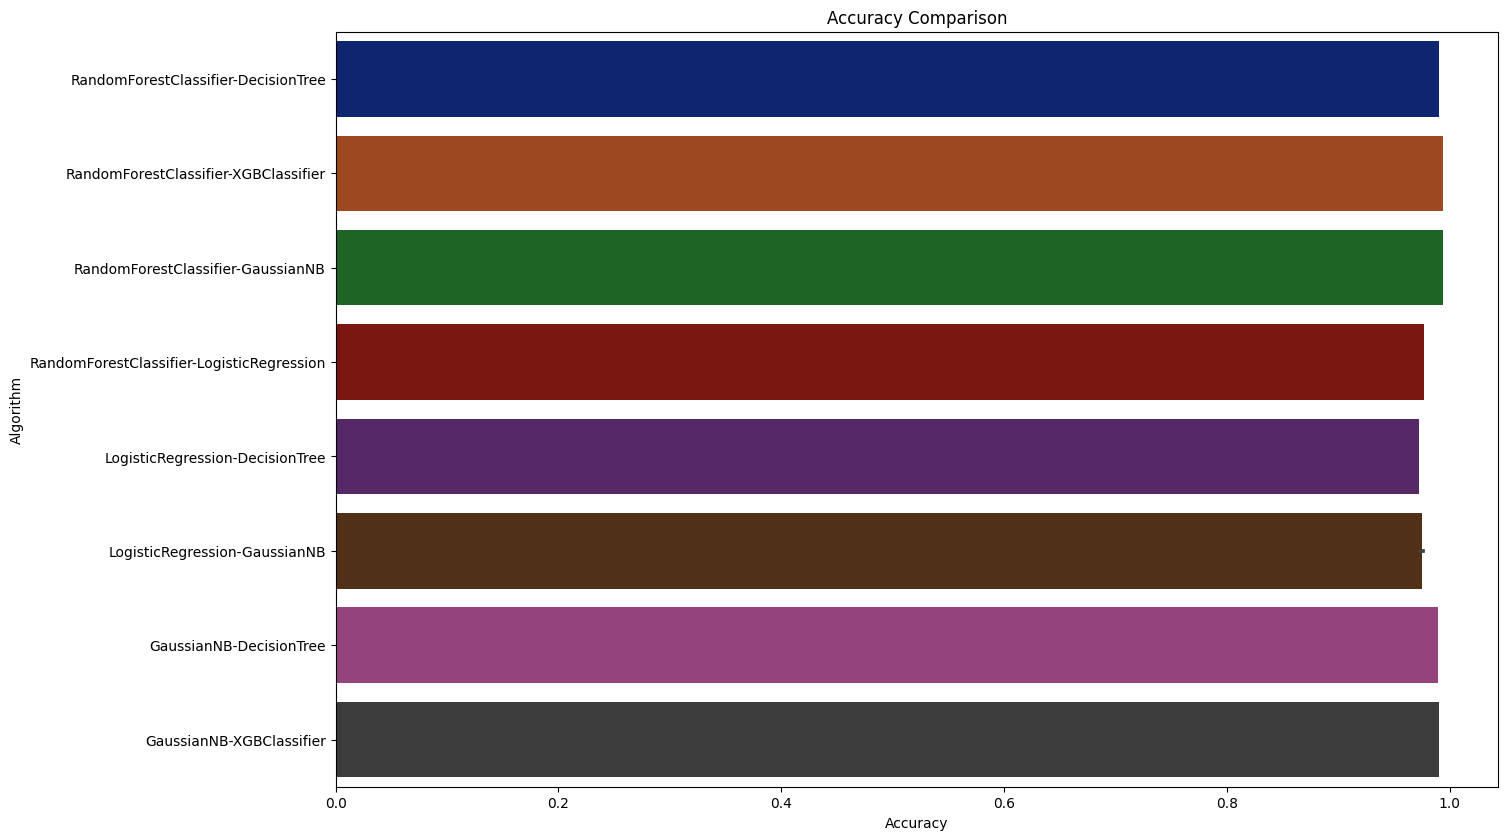

In [83]:
plt.figure(figsize=[15,10],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y =modelName,palette='dark')

# Now by using the voting lets combine 3 algorithms togther and check their accuracy

In [84]:

for i in acc:
  acc1.append(i)

for i in modelName:
  modelName1.append(i); 

acc=[]
modelName=[]

In [85]:

model1 = GaussianNB()
model2 = LogisticRegression(random_state=1)
model3= tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('gnb', model1), ('lr', model2), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("LR-GNB-DT")

In [86]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

In [87]:
model1 = xgb.XGBClassifier()
model2 = LogisticRegression(random_state=1)
model3= tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('xgb', model1), ('lr', model2), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("XGB-GNB-DT")

In [88]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

In [89]:
model1 = GaussianNB()
model2 = RandomForestClassifier(random_state=1)
model3= tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('gnb', model1), ('RFC', model2), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("LR-RFC-DT")

In [90]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.99545455, 0.99318182, 0.99772727, 0.99318182, 0.99090909])

In [91]:
model1 = GaussianNB()
model2 = RandomForestClassifier(random_state=1)
model3= tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('gnb', model1), ('RFC', model2), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("RFC-GNB-DT")

In [92]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.99545455, 0.99318182, 0.99772727, 0.99318182, 0.99090909])

In [93]:
model1 = GaussianNB()
model2 = xgb.XGBClassifier()
model3= tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('gnb', model1), ('xgb', model2), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("RFC-GNB-DT")

In [94]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.99318182, 0.99318182, 0.99318182, 0.99090909, 0.99090909])

In [95]:
model1 = GaussianNB()
model2 = LogisticRegression(random_state=1)
model3= RandomForestClassifier(random_state=1)
model = VotingClassifier(estimators=[('gnb', model1), ('lr', model2), ('RFC', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("LR-GNB-RFC")

In [96]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

In [97]:
model1 = GaussianNB()
model2 = LogisticRegression(random_state=1)
model3= xgb.XGBClassifier()
model = VotingClassifier(estimators=[('gnb', model1), ('lr', model2), ('xgb', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("LR-GNB-XGB")

In [98]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

# Now by voting we have compare the combination of 3-3 algorithms, lets check the accuracy of each combination

In [99]:
accuracy_models = dict(zip(modelName, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

LR-GNB-DT --> 0.9621212121212122
XGB-GNB-DT --> 0.9621212121212122
LR-RFC-DT --> 0.9954545454545455
RFC-GNB-DT --> 0.9954545454545455
LR-GNB-RFC --> 0.9621212121212122
LR-GNB-XGB --> 0.9621212121212122


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

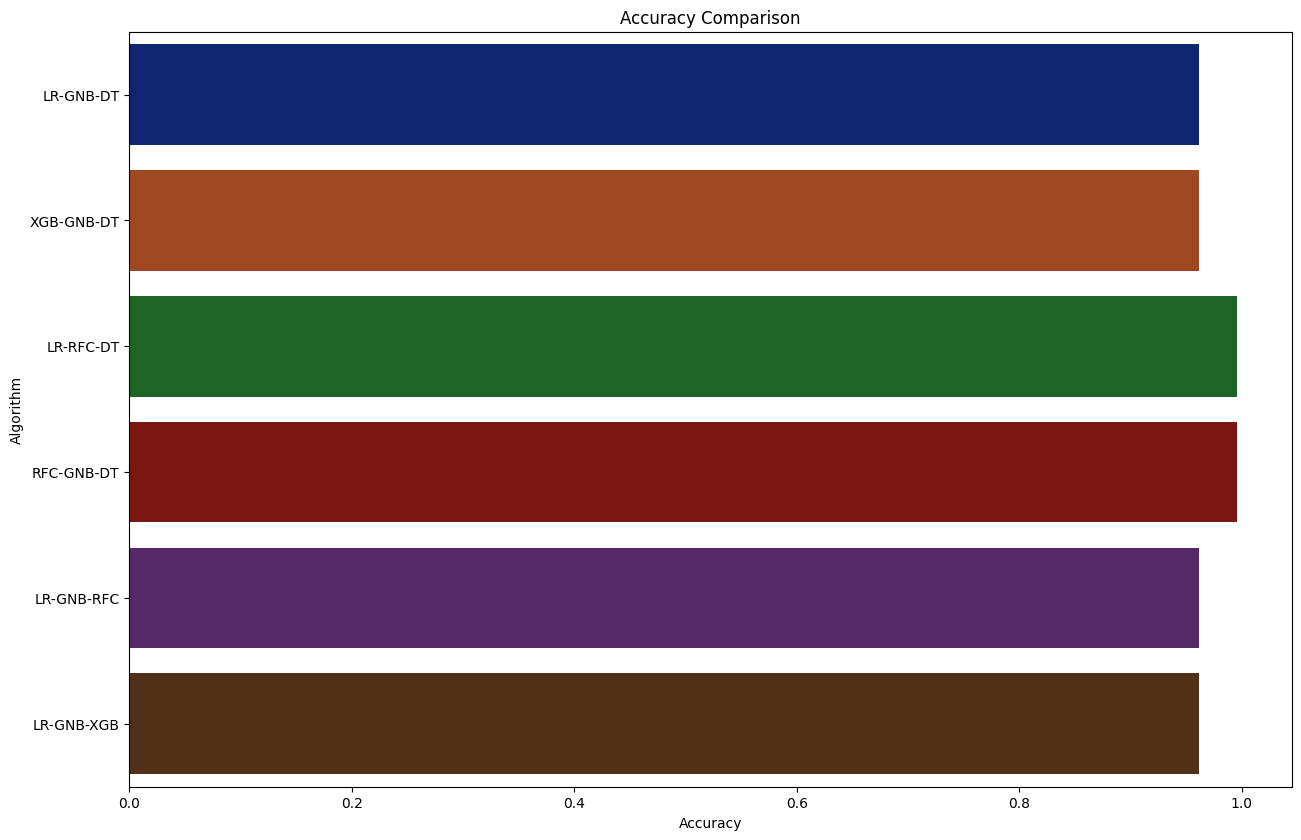

In [100]:
plt.figure(figsize=[15,10],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y =modelName,palette='dark')

# Campare the combination of 4-4 algorithms

In [101]:

for i in acc:
  acc1.append(i)

for i in modelName:
  modelName1.append(i); 

acc=[]
modelName=[]

In [102]:
model1 = GaussianNB()
model2 = LogisticRegression(random_state=1)
model3= tree.DecisionTreeClassifier(random_state=1)
model4= RandomForestClassifier(random_state=1)
model = VotingClassifier(estimators=[('gnb', model1), ('lr', model2), ('dt', model3),("RFC",model4)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("LR-GNB-DT-RFC")

In [103]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99318182, 0.99545455, 0.98636364])

In [104]:
model1 = GaussianNB()
model2 = LogisticRegression(random_state=1)
model3= tree.DecisionTreeClassifier(random_state=1)
model4= xgb.XGBClassifier()
model = VotingClassifier(estimators=[('gnb', model1), ('lr', model2), ('dt', model3),("xgb",model4)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("LR-GNB-DT-XGB")

In [105]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.99318182, 0.99318182, 0.99318182, 0.99318182, 0.98636364])

In [106]:
model1 = xgb.XGBClassifier()
model2 = LogisticRegression(random_state=1)
model3= tree.DecisionTreeClassifier(random_state=1)
model4= RandomForestClassifier(random_state=1)
model = VotingClassifier(estimators=[('xgb', model1), ('lr', model2), ('dt', model3),("RFC",model4)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("XGB-GNB-DT-RFC")

In [107]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.99318182, 0.99318182, 0.99545455, 0.99545455, 0.98863636])

In [108]:
model1 = xgb.XGBClassifier()
model2 = LogisticRegression(random_state=1)
model3= tree.DecisionTreeClassifier(random_state=1)
model4= RandomForestClassifier(random_state=1)
model = VotingClassifier(estimators=[('xgb', model1), ('lr', model2), ('dt', model3),("RFC",model4)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("XGB-GNB-DT-RFC")

In [109]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.99318182, 0.99318182, 0.99545455, 0.99545455, 0.98863636])

In [110]:
model1 = xgb.XGBClassifier()
model2 = LogisticRegression(random_state=1)
model3= tree.DecisionTreeClassifier(random_state=1)
model4=  GaussianNB()
model = VotingClassifier(estimators=[('xgb', model1), ('lr', model2), ('dt', model3),("gnb",model4)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("XGB-LR-DT-GNB")

In [111]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.99318182, 0.99318182, 0.99318182, 0.99318182, 0.98636364])

In [112]:
x

0.9924242424242424

# Analysis between different combination of model

In [113]:
accuracy_models = dict(zip(modelName, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

LR-GNB-DT-RFC --> 0.9939393939393939
LR-GNB-DT-XGB --> 0.9924242424242424
XGB-GNB-DT-RFC --> 0.9954545454545455
XGB-LR-DT-GNB --> 0.9924242424242424


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

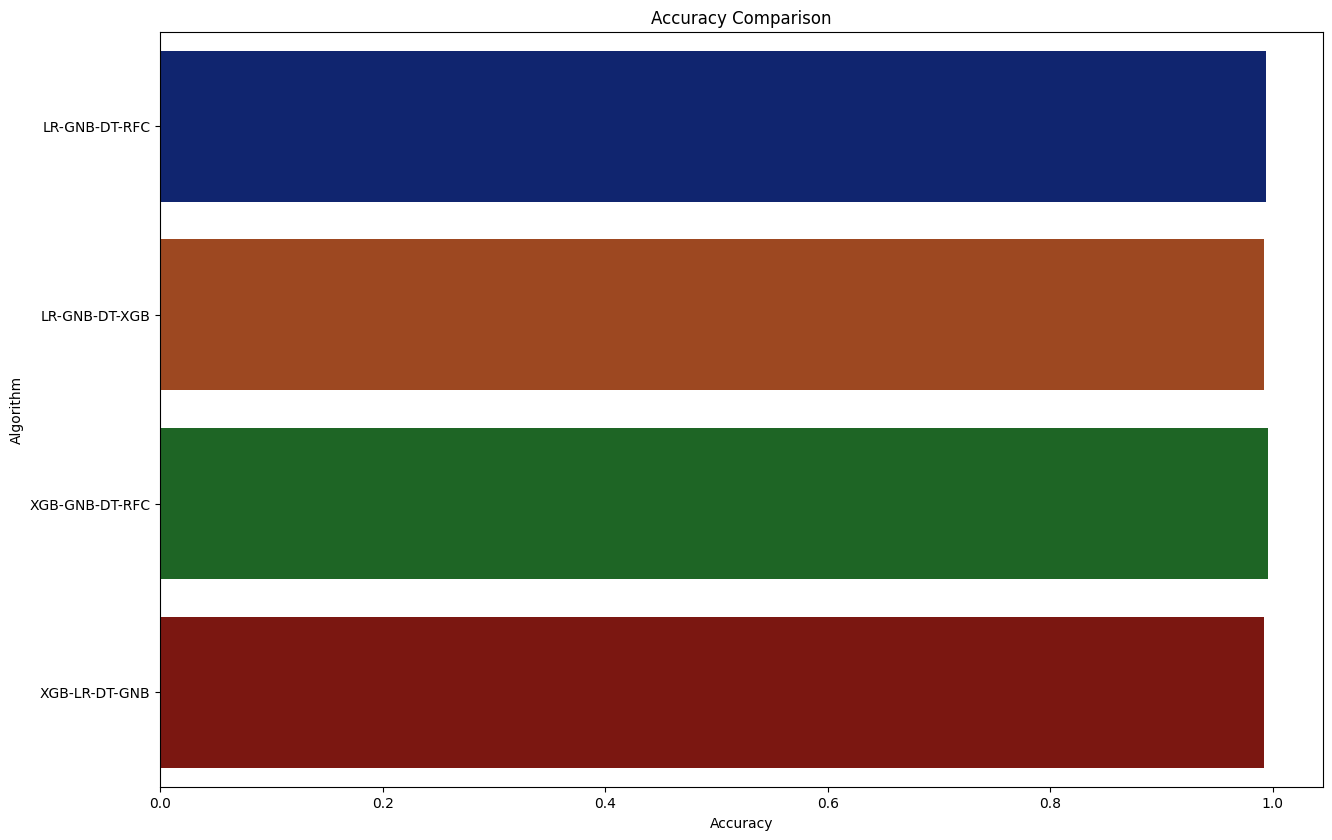

In [114]:
plt.figure(figsize=[15,10],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y =modelName,palette='dark')

# Comparing all algorithms we have train till now

In [115]:
accuracy_models = dict(zip(modelName1, acc1))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.8590909090909091
Naive Bayes --> 0.9924242424242424
Logistic Regression --> 0.9621212121212122
RF --> 0.9893939393939394
XGBoost --> 0.9954545454545455
KNN --> 0.9848484848484849
MLP --> 0.9454545454545454
RandomForestClassifier-DecisionTree --> 0.990909090909091
RandomForestClassifier-XGBClassifier --> 0.9939393939393939
RandomForestClassifier-GaussianNB --> 0.9939393939393939
RandomForestClassifier-LogisticRegression --> 0.9772727272727273
LogisticRegression-DecisionTree --> 0.9727272727272728
LogisticRegression-GaussianNB --> 0.9742424242424242
GaussianNB-DecisionTree --> 0.9893939393939394
GaussianNB-XGBClassifier --> 0.990909090909091
LR-GNB-DT --> 0.9621212121212122
XGB-GNB-DT --> 0.9621212121212122
LR-RFC-DT --> 0.9954545454545455
RFC-GNB-DT --> 0.9954545454545455
LR-GNB-RFC --> 0.9621212121212122
LR-GNB-XGB --> 0.9621212121212122


In [116]:
max(acc1)
index=acc1.index(max(acc1))

In [117]:
index

4

In [118]:
print("The best algorithm is: ",end="")
print(modelName1[4])


The best algorithm is: XGBoost


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

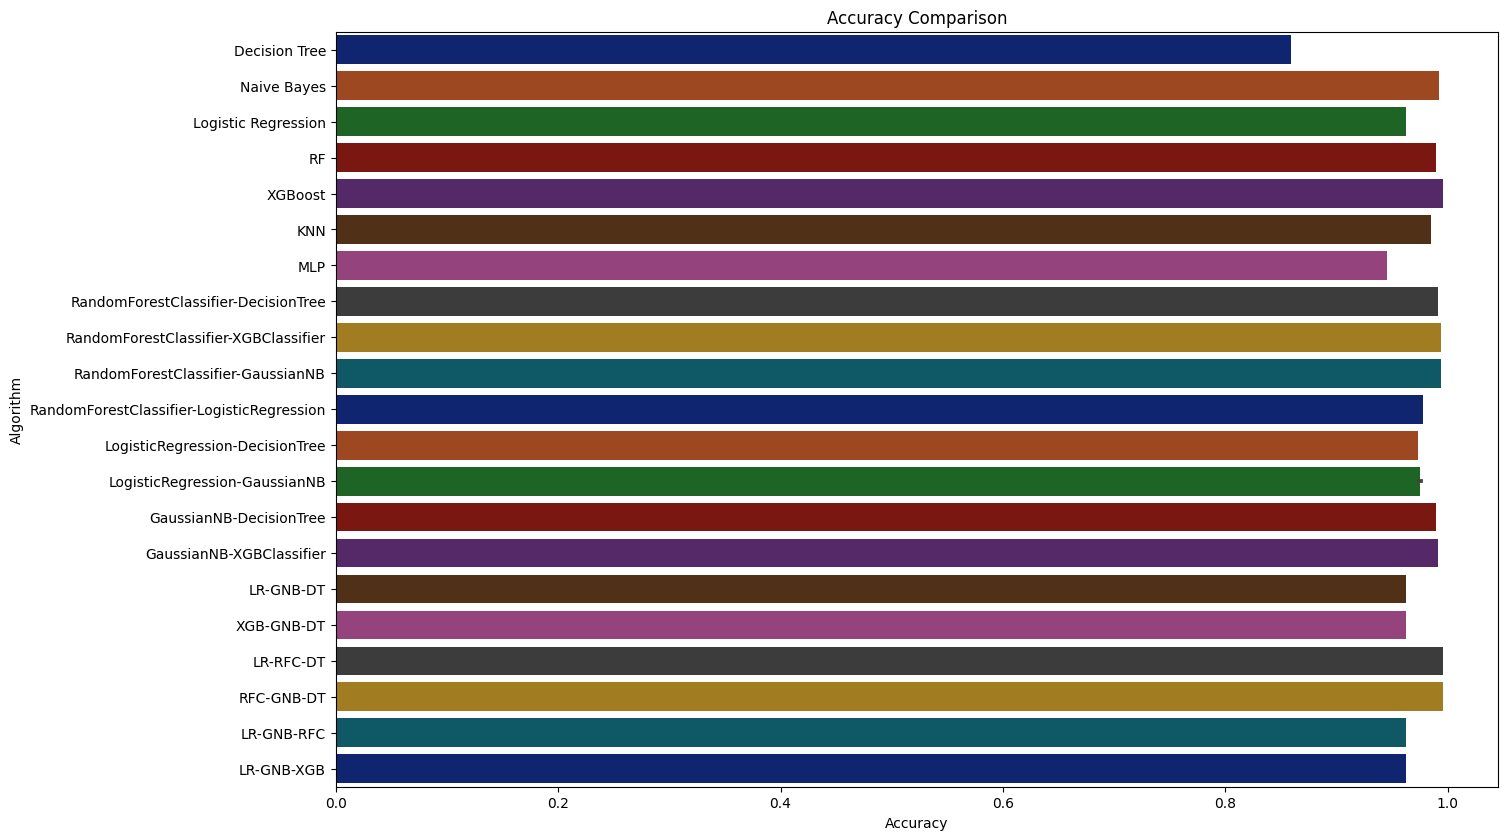

In [119]:
plt.figure(figsize=[15,10],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc1,y =modelName1,palette='dark')

In [120]:
modelName1

['Decision Tree',
 'Naive Bayes',
 'Logistic Regression',
 'RF',
 'XGBoost',
 'KNN',
 'MLP',
 'RandomForestClassifier-DecisionTree',
 'RandomForestClassifier-XGBClassifier',
 'RandomForestClassifier-GaussianNB',
 'RandomForestClassifier-LogisticRegression',
 'LogisticRegression-DecisionTree',
 'LogisticRegression-GaussianNB',
 'LogisticRegression-GaussianNB',
 'GaussianNB-DecisionTree',
 'GaussianNB-XGBClassifier',
 'LR-GNB-DT',
 'XGB-GNB-DT',
 'LR-RFC-DT',
 'RFC-GNB-DT',
 'RFC-GNB-DT',
 'LR-GNB-RFC',
 'LR-GNB-XGB']

In [121]:
acc1

[0.8590909090909091,
 0.9924242424242424,
 0.9621212121212122,
 0.9893939393939394,
 0.9954545454545455,
 0.9848484848484849,
 0.9454545454545454,
 0.990909090909091,
 0.9939393939393939,
 0.9939393939393939,
 0.9772727272727273,
 0.9727272727272728,
 0.9757575757575757,
 0.9742424242424242,
 0.9893939393939394,
 0.990909090909091,
 0.9621212121212122,
 0.9621212121212122,
 0.9954545454545455,
 0.9954545454545455,
 0.9954545454545455,
 0.9621212121212122,
 0.9621212121212122]

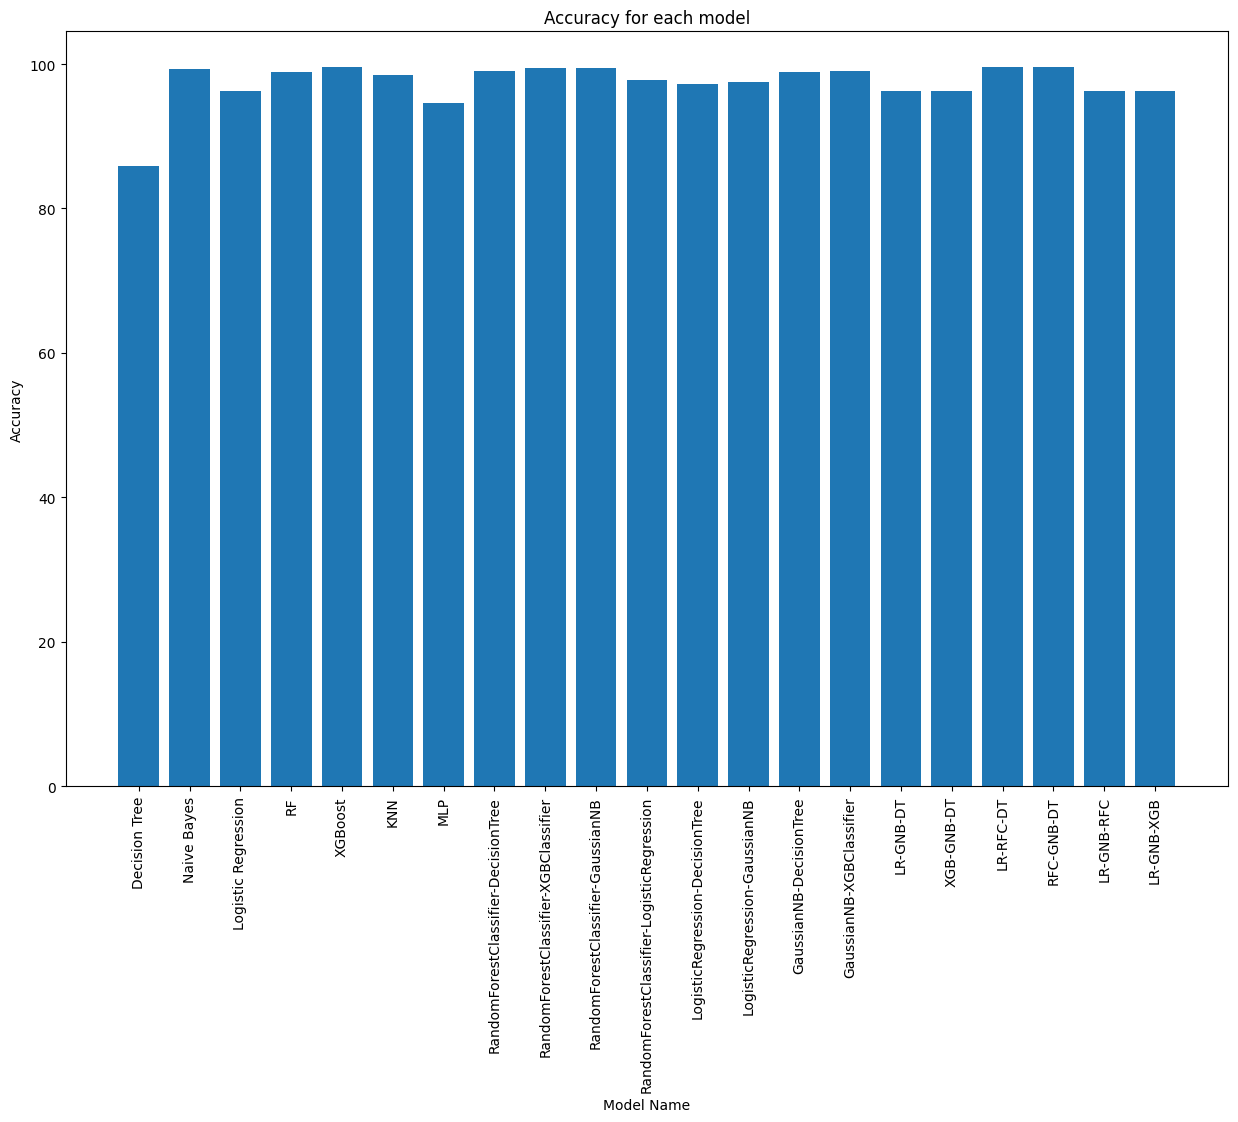

In [122]:
import matplotlib.pyplot as plt
 
Percent1 = []
for i in acc1:
  Percent1.append(i*100)

plt.figure(figsize=[15,10],dpi = 100)
plt.bar(modelName1, Percent1)
plt.xticks(rotation=90)
plt.xlabel("Model Name")
plt.ylabel("Accuracy")
plt.title("Accuracy for each model")
plt.show()



# Building the combine model of XGBoost's submodel

In [123]:
xg_model_name=[]

In [124]:
for i in range(1,11):
  # Splitting into train and test data
 
  Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.3,random_state =2)
  le = LabelEncoder()
  y_train = le.fit_transform(Ytrain)
  XB = xgb.XGBClassifier()
  XB.fit(Xtrain,y_train)
 

  y_pred = XB.predict(Xtest)
  y_pred = le.inverse_transform(y_pred)

  x = metrics.accuracy_score(Ytest, y_pred) 
  xg_model_name.append(XB) 
  print("XGBoost's Accuracy is: ", x) 

XGBoost's Accuracy is:  0.9954545454545455
XGBoost's Accuracy is:  0.9954545454545455
XGBoost's Accuracy is:  0.9954545454545455
XGBoost's Accuracy is:  0.9954545454545455
XGBoost's Accuracy is:  0.9954545454545455
XGBoost's Accuracy is:  0.9954545454545455
XGBoost's Accuracy is:  0.9954545454545455
XGBoost's Accuracy is:  0.9954545454545455
XGBoost's Accuracy is:  0.9954545454545455
XGBoost's Accuracy is:  0.9954545454545455


In [125]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.3,random_state =2)

In [126]:
res_estimator_list = [(("xgb"+str(i)), (xg_model_name[i]))
                       for i in range(len(xg_model_name)) ]

In [127]:
res_estimator_list

[('xgb0', XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                objective='multi:softprob', predictor=None, ...)),
 ('xgb1', XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
      

In [128]:
# Build stack model
xg_stack_model = StackingClassifier(
    estimators=res_estimator_list, final_estimator=LogisticRegression()
)

In [129]:
# Train stacked model
xg_stack_model.fit(Xtrain, Ytrain)

StackingClassifier(estimators=[('xgb0',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob',
                                              predictor=None, ...))],
                   final_estimator=LogisticRegression())

In [130]:
y_test_pred = xg_stack_model.predict(Xtest)

In [131]:
xg_stack_model_test_accuracy = round(metrics.accuracy_score(Ytest, y_test_pred)*100,2) # Calculate Accuracy

In [132]:
xg_stack_model_test_accuracy

99.7

In [133]:
 # Dump the trained Naive Bayes classifier with Pickle
xgbs_pkl_filename = 'xgbs.pkl'
# Open the file to save as pkl file
xgbs_Model_pkl = open(xgbs_pkl_filename, 'wb')
pickle.dump(xg_stack_model, xgbs_Model_pkl)
# Close the pickle instances
xgbs_Model_pkl.close()

# Bagging of XGBooster
  

In [134]:
from sklearn.ensemble import BaggingClassifier

In [135]:
bagging_clf = BaggingClassifier(base_estimator=xgb.XGBClassifier(),
                         n_estimators=500,max_features=5, random_state=42)

In [136]:
bagging_clf.fit(Xtrain, Ytrain)

BaggingClassifier(base_estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               gpu_id=None, grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               n_estimators=100, n_jobs=None,
                                               num_parallel_tree=None,
                                               predictor=None,
                                               random_state=None, ...),
                  max_features=5, n_estimators=500, random_state=42)

In [137]:
y_pred=bagging_clf.predict(Xtest);

In [138]:
accuracy=metrics.accuracy_score(Ytest, y_pred)*100

In [139]:
accuracy

99.54545454545455